In [4]:
# import libraries
import tensorflow as tf

In [5]:
# Using train-test-split
# Loading our Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape== (60000,)
assert y_test.shape == (10000,)

In [9]:
# Summarizing the loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


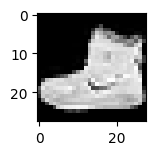

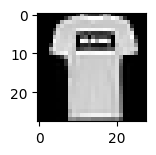

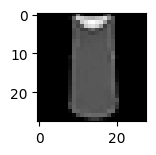

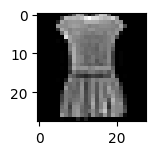

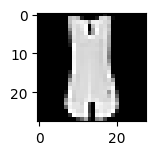

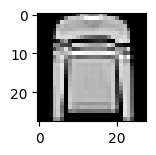

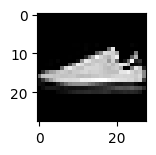

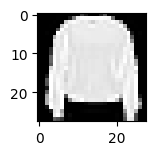

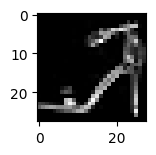

In [11]:
# plotting the first few images
import matplotlib.pyplot as plt 

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plotting raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # showing the figure
    plt.show()

In [12]:
# Preprocessing the data aka Normalization
X_train =   X_train / 255.0
X_test =   X_test / 255.0

In [16]:
# creating a sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # relu and softmax are popular activation functions used in python
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compiling our model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Training our model
model.fit(X_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy: ", test_acc)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4972 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3753 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3360 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3129 - accuracy: 0.8852
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.3454 - accuracy: 0.8771
Test accuracy:  0.8770999908447266


In [18]:
# Training our model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy: ", test_acc)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2792 - accuracy: 0.8974
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2695 - accuracy: 0.8998
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2572 - accuracy: 0.9053
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2489 - accuracy: 0.9077
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2367 - accuracy: 0.9125
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2303 - accuracy: 0.9134
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2226 - accuracy: 0.9173
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2154 - accuracy: 0.9190
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2119 - accuracy: 0.9203
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3

In [20]:
# Making predictions with our model
predictions = model.predict(X_test)

# Printing the shape of the predictions array
print(predictions.shape)

# printing the first 10 predictions
print(predictions[:10])

# convert the predictions to class labels
class_labels = [tf.argmax(predictions) for predictions in predictions]

# print the first 10 class labels
print(class_labels[:10])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[[4.25480806e-08 5.99837069e-10 1.35291700e-09 7.12547310e-09
  7.53985329e-12 2.11600534e-04 3.73155684e-09 4.22613043e-03
  2.84990254e-09 9.95562315e-01]
 [2.47427906e-05 1.73361664e-16 9.99669313e-01 5.34795258e-14
  2.97596009e-04 3.39691484e-14 8.32911883e-06 7.50104484e-23
  2.89926388e-10 8.29315853e-21]
 [2.61777586e-07 9.99999762e-01 1.78373511e-13 1.27267237e-08
  2.99648544e-12 9.85308526e-22 1.88663113e-10 6.50908634e-23
  3.04176104e-14 1.17178082e-20]
 [1.42805149e-07 9.99989390e-01 4.35364418e-11 1.04535511e-05
  1.94624761e-09 6.38158394e-17 2.82701507e-08 2.37319475e-20
  4.04288799e-13 2.23540275e-15]
 [1.97654054e-01 2.97661978e-10 4.26300522e-03 2.11186234e-05
  7.39787138e-05 3.79068998e-11 7.97981381e-01 2.94541114e-10
  6.44414013e-06 6.09458751e-12]
 [9.69102039e-05 9.99902964e-01 8.91696228e-09 2.09549125e-08
  3.43379422e-11 3.72106811e-19 1.19064850e-07 1.16076692e-22
  7.71014247e-14 3.37932

Epoch 1/15
1719/1719 [==============================] - 8s 4ms/step - loss: 1.1346 - accuracy: 0.6473 - val_loss: 0.7228 - val_accuracy: 0.7524
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6622 - accuracy: 0.7622 - val_loss: 0.5973 - val_accuracy: 0.7874
Epoch 3/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5810 - accuracy: 0.7905 - val_loss: 0.5451 - val_accuracy: 0.8070
Epoch 4/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5365 - accuracy: 0.8087 - val_loss: 0.5082 - val_accuracy: 0.8244
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5072 - accuracy: 0.8197 - val_loss: 0.4842 - val_accuracy: 0.8336
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4860 - accuracy: 0.8283 - val_loss: 0.4665 - val_accuracy: 0.8386
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4700 - accuracy: 0.8352 - val_loss: 0.4517 - val_accuracy:

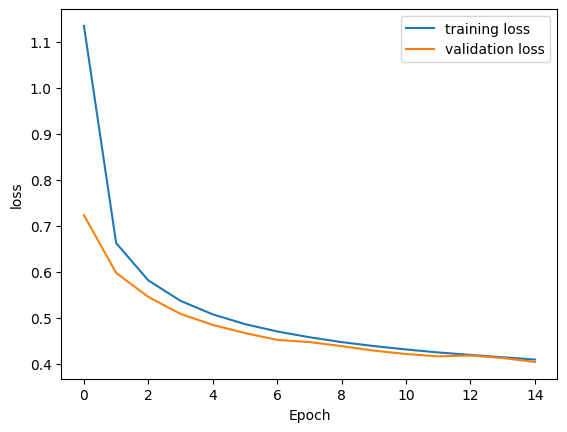

In [22]:
# import libraries
import tensorflow as tf

# Using train-test-split
# Loading our Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocessing the data aka Normalization
X_train =   X_train / 255.0
X_test =   X_test / 255.0

# Split the training data into training and validation sets 
x_val = X_train[:5000]
y_val = y_train[:5000]
X_train = X_train[5000:]
y_train = y_train[5000:]

# creating a sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # relu and softmax are popular activation functions used in python
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compiling our model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(x_val, y_val))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')

plt.legend()
plt.show()

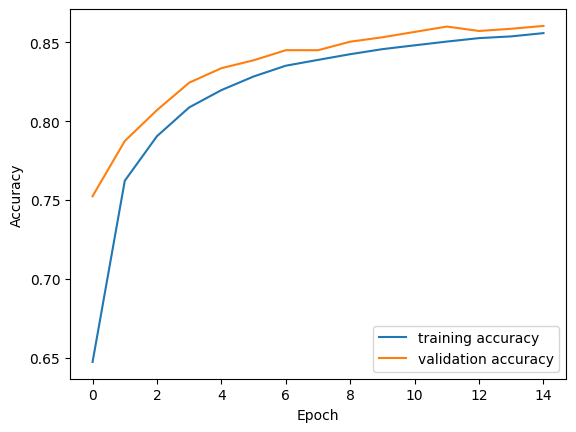

In [23]:
# plot the training and validation accuracy

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4422 - accuracy: 0.8421
Test loss:  0.4421934187412262
Test accuracy:  0.8421000242233276
